In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(10 Points)

In [3]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (10 Points)

data.groupby(by=['MaritalDesc','Sex'])\
    .agg(min_salary=('Salary','min'),
         median_salary=('Salary','median'),
         max_salary=('Salary','max'),
         average_salary=('Salary','mean'))

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(10 Points)

In [4]:
#code here
data.groupby(['TermReason']).agg(total_termination=('TermReason','count')).sort_values(by='total_termination', ascending=False).head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(10 Points)

In [5]:
#code here
data[data['PerformanceScore'] == 'Exceeds'].groupby(['RecruitmentSource']).agg(total_recruit=('RecruitmentSource','count')).sort_values(by='total_recruit', ascending=False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(10 Points)

In [6]:
#code here
data.groupby(by=['Department']).agg(total_manager=('ManagerName','nunique'))

,total_manager
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(10 Points)

In [7]:
#code here
print(data.groupby(by=['Sex'])['Termd'].value_counts(normalize=True).rename('Termd'))

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization Question

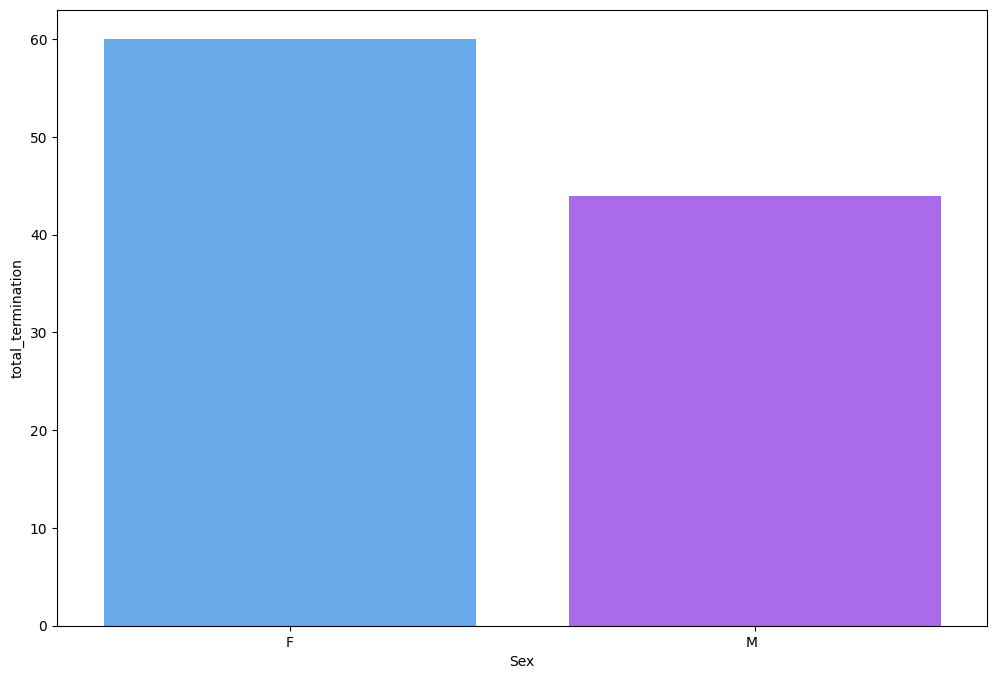

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

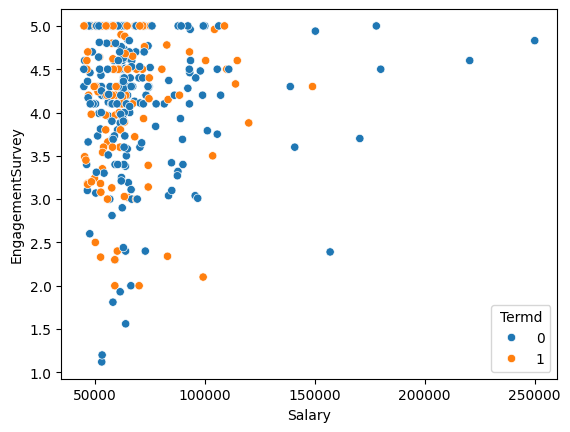

In [9]:
#code here
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data)

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

<Axes: xlabel='Termd', ylabel='Department'>

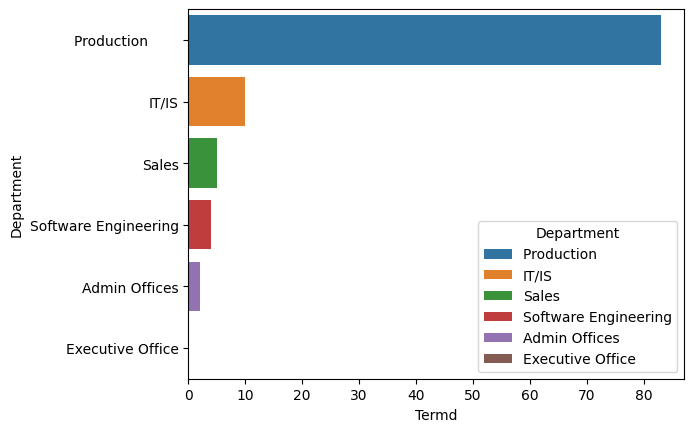

In [10]:
dbarchart = data.groupby(by=['Department']).agg(Termd=('Termd','sum')).sort_values(by='Termd', ascending=False)

sns.barplot(x='Termd', y='Department', hue="Department", data=dbarchart, legend=True)

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

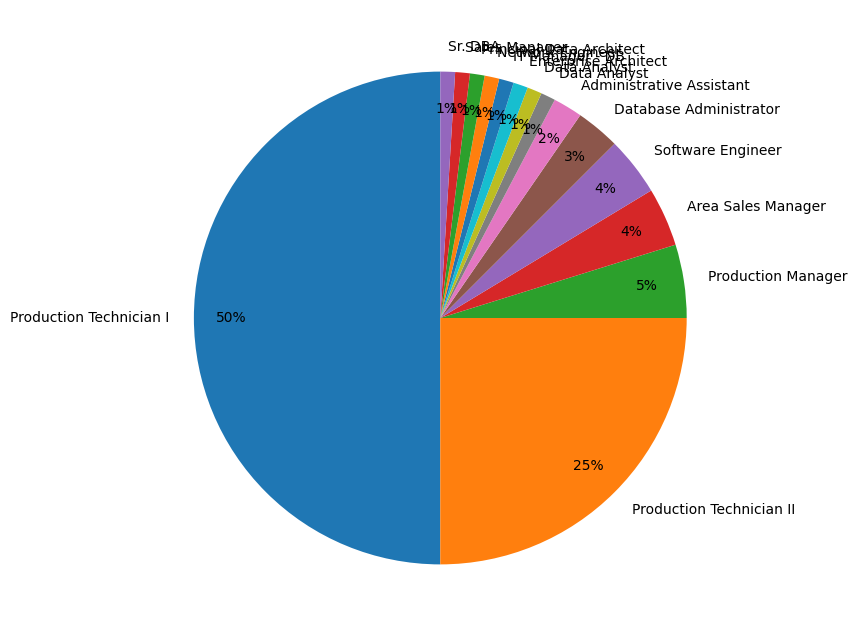

In [11]:
dpie = data[data['Termd'] == 1].groupby('Position').size()
dpie = dpie.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(dpie, labels=dpie.index, autopct='%1.0f%%',
        startangle=90, pctdistance=0.85)
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

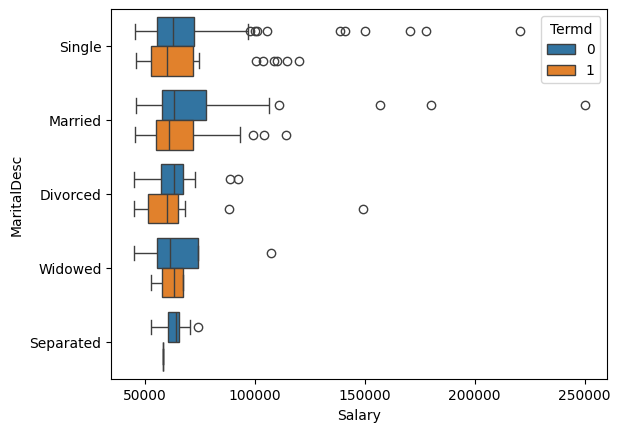

In [12]:
#code here
sns.boxplot(x="Salary", y='MaritalDesc', hue='Termd', data=data)

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(10 points)

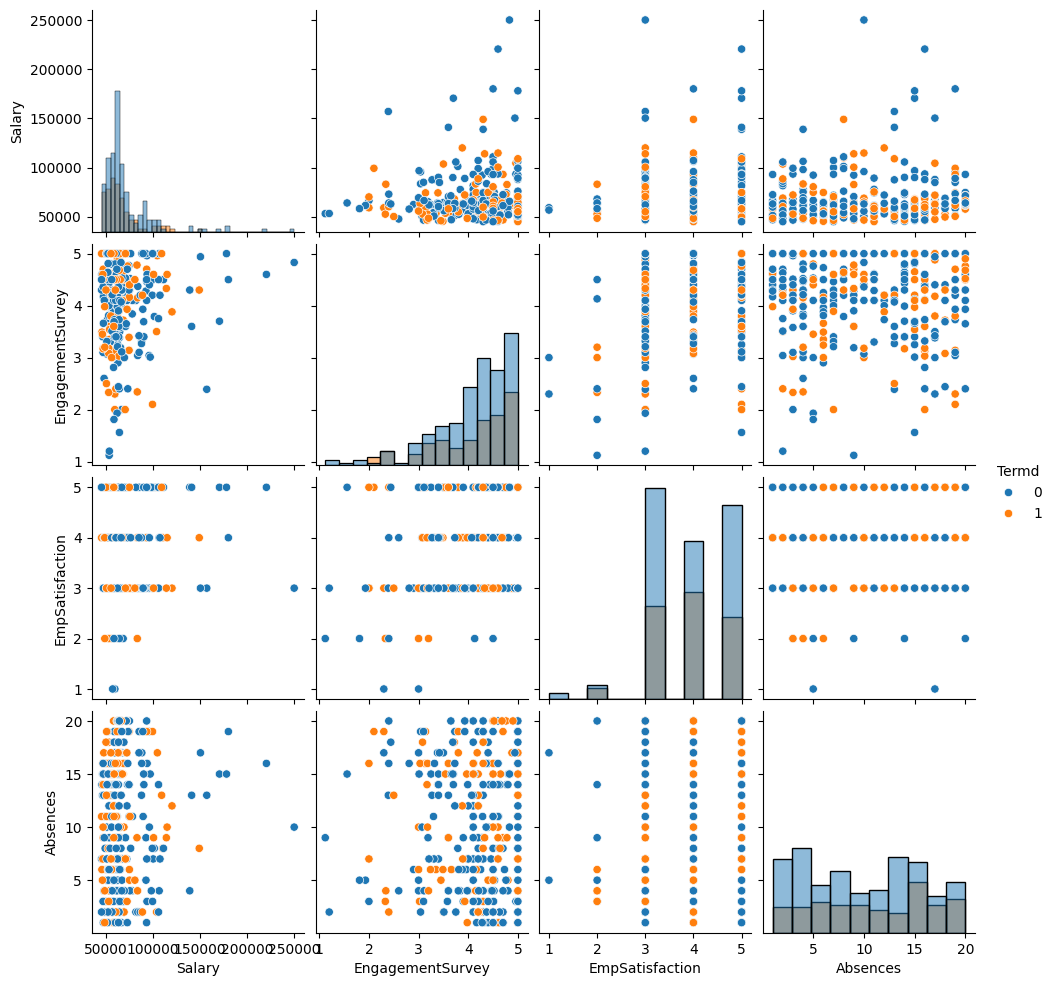

In [13]:
#codde here
sns.pairplot(data, hue='Termd', vars=['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'], diag_kind='hist')

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (10 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (10 points)<br>

Jawaban No 11.

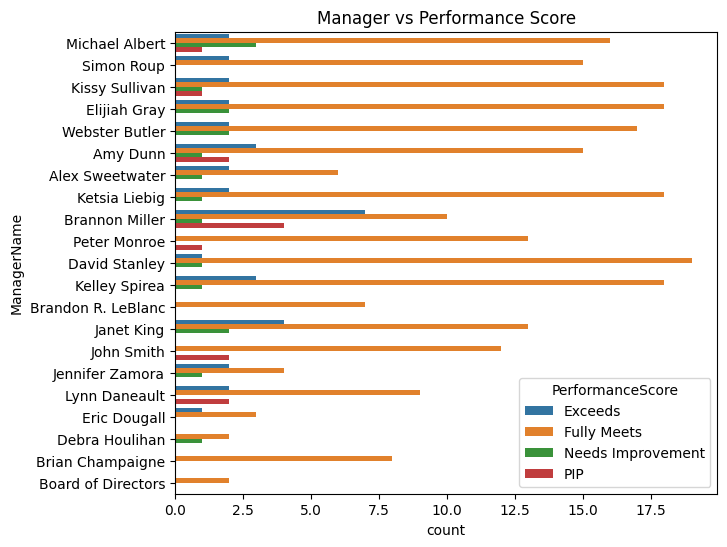

Chi-Square Statistic: 67.00285400941642
P-value: 0.24942407783130077
There is no significant relationship between Manager and Performance Score.


In [14]:
#Jawban No. 11
from scipy.stats import chi2_contingency

# Visualisasikan hubungan antara ManagerName dan PerformanceScore
plt.figure(figsize=(7,6))
sns.countplot(y='ManagerName', hue='PerformanceScore', data=data)

plt.title('Manager vs Performance Score')
plt.show()

# Buat tabel kontingensi untuk meringkas hubungan tersebut
contingency_table = pd.crosstab(data['ManagerName'], data['PerformanceScore'])

# Lakukan uji Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Cetak hasil
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretasi hasil
if p_value < 0.05:
    print("There is a significant relationship between Manager and Performance Score.")
else:
    print("There is no significant relationship between Manager and Performance Score.")

Berdasarkan uji Chi-Square, p-value yang dihasilkan lebih besar dari 0.05.
Berdasarkan analisis yang dilakukan secara keseluruhan, hasilnya tidak ada hubungan yang signifikan antara manajer dan skor performa kinerja.
Namun, beberapa manajer mungkin dapat memengaruhi kinerja tim dan mempengaruhi skor performa dalam beberapa bidang. Manajer yang sering mengawasi tim, maka timnya memiliki kinerja lebih tinggi. Dan sebaliknya, manajer yang kurang mengawasi timnya, maka memiliki karyawan yang memerlukan peningkatan kinerja dan perbaikan.


Jawaban No 12.

In [15]:
#Jawban No. 12
data.groupby(by=['RecruitmentSource']).agg(total_termination=('Termd','sum')).sort_values(by='total_termination').head()

,total_termination
RecruitmentSource,
On-line Web application,1
Other,1
Website,1
Employee Referral,5
CareerBuilder,11


Berdasarkan data diatas, kami dapat melihat bahwa total terminasi yang paling rendah adalah rekrutmen yang berasal dari website, aplikasi web online, dan media lainnya dengan masing-masing terminasi sebanyak 1. Dengan hasil demikian, dapat kita simpulkan bahwa jika kita ingin memastikan rasio pemutusan hubungan kerja yang rendah, maka seharusnya perusahaan memilih sumber rekrutan terbaik yaitu dari website, aplikasi web online, dan media lainnya.
  
  